<a href="https://colab.research.google.com/github/ashishlamsal/sentiment-analysis/blob/main/notebooks/data-preprocessing-and-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
plt.rcParams["figure.dpi"] = 100
fprop = fm.FontProperties(fname='/content/drive/MyDrive/fusemachines/sentiment-analysis/font/Mangal_Regular.ttf')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Load Dataset

In [ ]:
# load dataset
path = r"/content/drive/MyDrive/fusemachines/sentiment-analysis/dataset/raw/covid19_tweeter_dataset.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Label,Datetime,Tweet,Tokanize_tweet
0,0,-1,2021-01-10 22:06:41+00:00,अमेरिकामा कोभिड बाट एकै दिन चार हजारभन्दा बढीक...,"अमेरिकामा,कोभिड,बाट,एकै,दिन,चार,हजारभन्दा,बढीक..."
1,1,-1,2021-01-10 17:49:34+00:00,कोभिड का कारण विदेशमा रहेका नेपालीहरुमा मानसिक...,"कोभिड,का,कारण,विदेशमा,रहेका,नेपालीहरुमा,मानसिक..."
2,2,1,2021-01-10 16:18:34+00:00,नेपालमा क्लोभर बायोफार्मास्युटिकल्स अस्ट्रेलिय...,"नेपालमा,क्लोभर,बायोफार्मास्युटिकल्स,अस्ट्रेलिय..."
3,3,0,2021-01-10 15:12:17+00:00,कोभिड को खोप पनि लगाइयो,"कोभिड,को,खोप,पनि,लगाइयो"
4,4,-1,2021-01-10 15:07:12+00:00,अमेरिकामा कोभिड को नयाँ रेकर्ड एकै दिन हजारभन्...,"अमेरिकामा,कोभिड,को,नयाँ,रेकर्ड,एकै,दिन,हजारभन्..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33474 entries, 0 to 33473
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      33474 non-null  int64 
 1   Label           33474 non-null  object
 2   Datetime        33474 non-null  object
 3   Tweet           33474 non-null  object
 4   Tokanize_tweet  33471 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


# Data Preprocessing

In [ ]:
# keep only text and label
df_clean = df[['Tweet', 'Label']].rename(columns={'Tweet':'text', 'Label': 'label'})

In [ ]:
# remove text less than 5 words 
df_final = df_clean[df_clean['text'].str.split().str.len() >=5]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32859 entries, 0 to 33473
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    32859 non-null  object
 1   label   32859 non-null  object
dtypes: object(2)
memory usage: 770.1+ KB


In [ ]:
# label contains other values except -1, 0, 1
df_final["label"].unique()

array(['-1', '1', '0', 'positive""', 'negative"', ';positive',
       "positive'\n3929,2020-10-16 12:15:51+00:00,भक्तपुर जिल्ला भित्रका सबै शक्तिपिठ तथा मन्दिरहरूमा नित्य पूजा बाहेक बली दिने दर्शनका लागि भीडभाड गर्ने लगायत कोभिड को संक्रमण फैलन सक्ने अन्य गतिबिधि गर्न निषेध गरिएको सूचना असोज,भक्तपुर",
       'neutral""', ',negative""',
       'negative"\n6179,2020-09-14 09:24:43+00:00,कोभिड को त्रासले आर्थिक मारमा शहरी गरिब बालबालिका पढेर प्रतिक्रिया दिनुहोला,कोभिड',
       'मन्त्रीज्यू,यदि,कतै,वहाँले,भने,जस्तो,स्थिति,रहेछ,भने,बाट,यस्तोयस्तो,अवस्थामा,कोभिड,निशुल्क,परिक्षण,यहाँ,यहाँ,बाट,हुन्छ,भनेर,एउटा,जनहितमा,सुचना,जारी,गर्न,पहल,गर्नुभए,हुन्थ्यो',
       "negative'\n12021,2020-07-12 03:12:24+00:00,कोरोना भाइरस कोभिड को महामारी फैलिएयता अमेरिकी राष्ट्रपति डोनाल्ड ट्रम्प पहिलो पटक मास्कमा देखिएका छन्,कोरोना",
       "negative'\n12025,2020-07-12 02:23:32+00:00,अमिताभ बच्चन र उहाँको छोरो पनि कोभिड संक्रमित भएका छन् उहाँहरू को स्वास्थ्य लाभको कामना सचेत रहौं सुरक्षित रहौं,अमिताभ",
       "n

In [ ]:
# take only rows havinf label -1, 0, 1 
df_filtered = df_final[ (df_final['label'] == '1') | (df_final['label'] == '0') | (df_final['label'] == '-1')]

In [ ]:
df_filtered["label"].value_counts()

1     14823
-1    13410
0      4591
Name: label, dtype: int64

# Exploratory Data Analysis

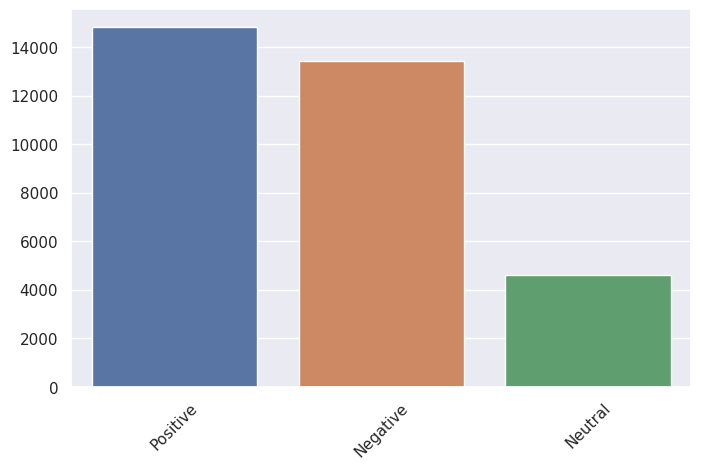

In [ ]:
# create the value_counts series
value_counts_series = df_filtered['label'].value_counts()

# plot the value_counts series
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x=value_counts_series.index, y=value_counts_series.values)

# Get the current Axes object
ax = plt.gca()

# Set the labels of the x-axis
ax.set_xticklabels(["Positive", "Negative", "Neutral"])
plt.xticks(rotation=45)

# show the plot
plt.show()

In [ ]:
df_filtered.head()

,text,label
0,अमेरिकामा कोभिड बाट एकै दिन चार हजारभन्दा बढीक...,-1
1,कोभिड का कारण विदेशमा रहेका नेपालीहरुमा मानसिक...,-1
2,नेपालमा क्लोभर बायोफार्मास्युटिकल्स अस्ट्रेलिय...,1
3,कोभिड को खोप पनि लगाइयो,0
4,अमेरिकामा कोभिड को नयाँ रेकर्ड एकै दिन हजारभन्...,-1


In [ ]:
df_filtered.describe()

,text,label
count,32824,32824
unique,32808,3
top,कोभिड ले स्वास्थ्य खर्च अकासिने अर्थतन्त्र मन्...,1
freq,2,14823


In [ ]:
# Neplai stowords : it also includes nltk stopwords
!wget https://raw.githubusercontent.com/Suyogyart/nepali-transformers-evaluation/main/code/preprocessing/nepali_stopwords.txt

nepali_stopwords = set(line.strip() for line in open('nepali_stopwords.txt', 'r'))

--2023-01-14 14:06:11--  https://raw.githubusercontent.com/Suyogyart/nepali-transformers-evaluation/main/code/preprocessing/nepali_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7189 (7.0K) [text/plain]
Saving to: ‘nepali_stopwords.txt’

nepali_stopwords.tx 100%[===================>]   7.02K  --.-KB/s    in 0s      

2023-01-14 14:06:11 (66.8 MB/s) - ‘nepali_stopwords.txt’ saved [7189/7189]



In [ ]:
def get_counter_obj(text,remove_stopword =False, n=10):
  # Tokenize the sentences in the first column of the DataFrame
  tokenized_sentences = np.array([word_tokenize(sentence) for sentence in text.values])
  flattened_list = [word for sublist in tokenized_sentences for word in sublist]
  if remove_stopword:
    flattened_list =[ word for word in flattened_list if word not in nepali_stopwords]
    
  # Count the occurrences of each word
  word_counts = Counter(flattened_list)
  return word_counts.most_common(n)

In [ ]:
most_repeated_words = df_filtered.groupby('label')['text'].apply(lambda x : get_counter_obj(x,remove_stopword =True))

<ipython-input-17-f787118ed0e5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tokenized_sentences = np.array([word_tokenize(sentence) for sentence in text.values])


In [ ]:
# Convert the series to a dataframe and flatten the dataframe
df_words = pd.DataFrame.from_dict(most_repeated_words.to_dict()).melt()

# Rename the columns
df_words = df_words.rename(columns={'variable':'label', 'value':'word_count'})

# Extract the word and count from the tuple
df_words[['word', 'count']] = pd.DataFrame(df_words['word_count'].tolist())
df_words

,label,word_count,word,count
0,-1,"(कोभिड, 13714)",कोभिड,13714
1,-1,"(कोरोना, 4497)",कोरोना,4497
2,-1,"(मृत्यु, 2905)",मृत्यु,2905
3,-1,"(भाइरस, 2567)",भाइरस,2567
4,-1,"(संक्रमण, 2243)",संक्रमण,2243
5,-1,"(संख्या, 1856)",संख्या,1856
6,-1,"(पुष्टि, 1725)",पुष्टि,1725
7,-1,"(संक्रमित, 1647)",संक्रमित,1647
8,-1,"(जनामा, 1419)",जनामा,1419
9,-1,"(नेपालमा, 1286)",नेपालमा,1286


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


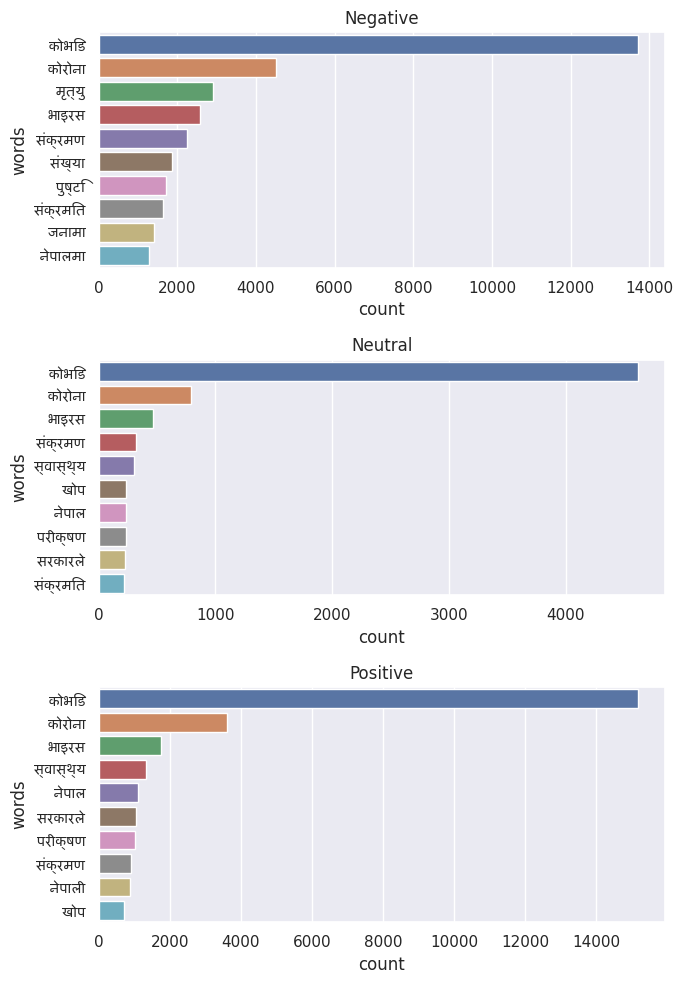

In [ ]:
# Group the data by the 'label' column
groups = df_words.groupby('label')

# Create a figure with 4 rows and 4 columns
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

# Iterate through the groups and plot a histogram of the text length values for each group
for i, (name, group) in enumerate(groups):
    sns.barplot(data=group, x='count',y='word', ax=ax[i%3], orient='h')
    ax[i%3].set_xlabel('count')
    ax[i%3].set_ylabel('words')
    if name == "-1":
      ax[i%3].set_title("Negative")
    elif name == "1":
      ax[i%3].set_title("Positive")
    else:
      ax[i%3].set_title("Neutral")

    ax[i%3].tick_params(labelbottom=True)

    # Get the x-axis tick labels
    labels = ax[i%3].get_yticklabels()

    # Set the font properties for the tick labels
    for label in labels:
      label.set_fontproperties(fprop)

plt.tight_layout()
plt.show()

# Export Cleaned data

In [ ]:
path = r"/content/drive/MyDrive/fusemachines/sentiment-analysis/dataset/clean/cleaned_dataset.csv"
df_filtered.to_csv(path, encoding='utf-8', index=False)

# Binary Classification

Prepare Data for binary classification into only positive and negative classes (by removing the neutral class)

In [ ]:
df_binary = df_final[ (df_final['label'] == '1') | (df_final['label'] == '-1')]

In [ ]:
df_binary["label"].value_counts()

1     14823
-1    13410
Name: label, dtype: int64

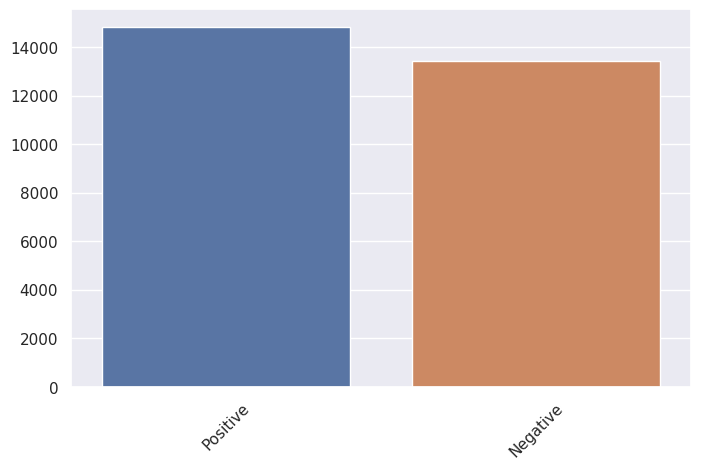

In [ ]:
# create the value_counts series
value_counts_series = df_binary['label'].value_counts()

# plot the value_counts series
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x=value_counts_series.index, y=value_counts_series.values)

# Get the current Axes object
ax = plt.gca()

# Set the labels of the x-axis
ax.set_xticklabels(["Positive", "Negative"])
plt.xticks(rotation=45)

# show the plot
plt.show()

In [ ]:
# export data
path = r"/content/drive/MyDrive/fusemachines/sentiment-analysis/dataset/clean/binary_dataset.csv"
df_binary.to_csv(path, encoding='utf-8', index=False)